In [5]:
from IPython.core.display import HTML
from IPython.display import Image
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# *Circuitos Elétricos I - Semana 8*

### Circuitos RL e RC de primeira ordem

Os quatro tipos possíveis de circuitos de primeira ordem estão ilustrados na figura abaixo.

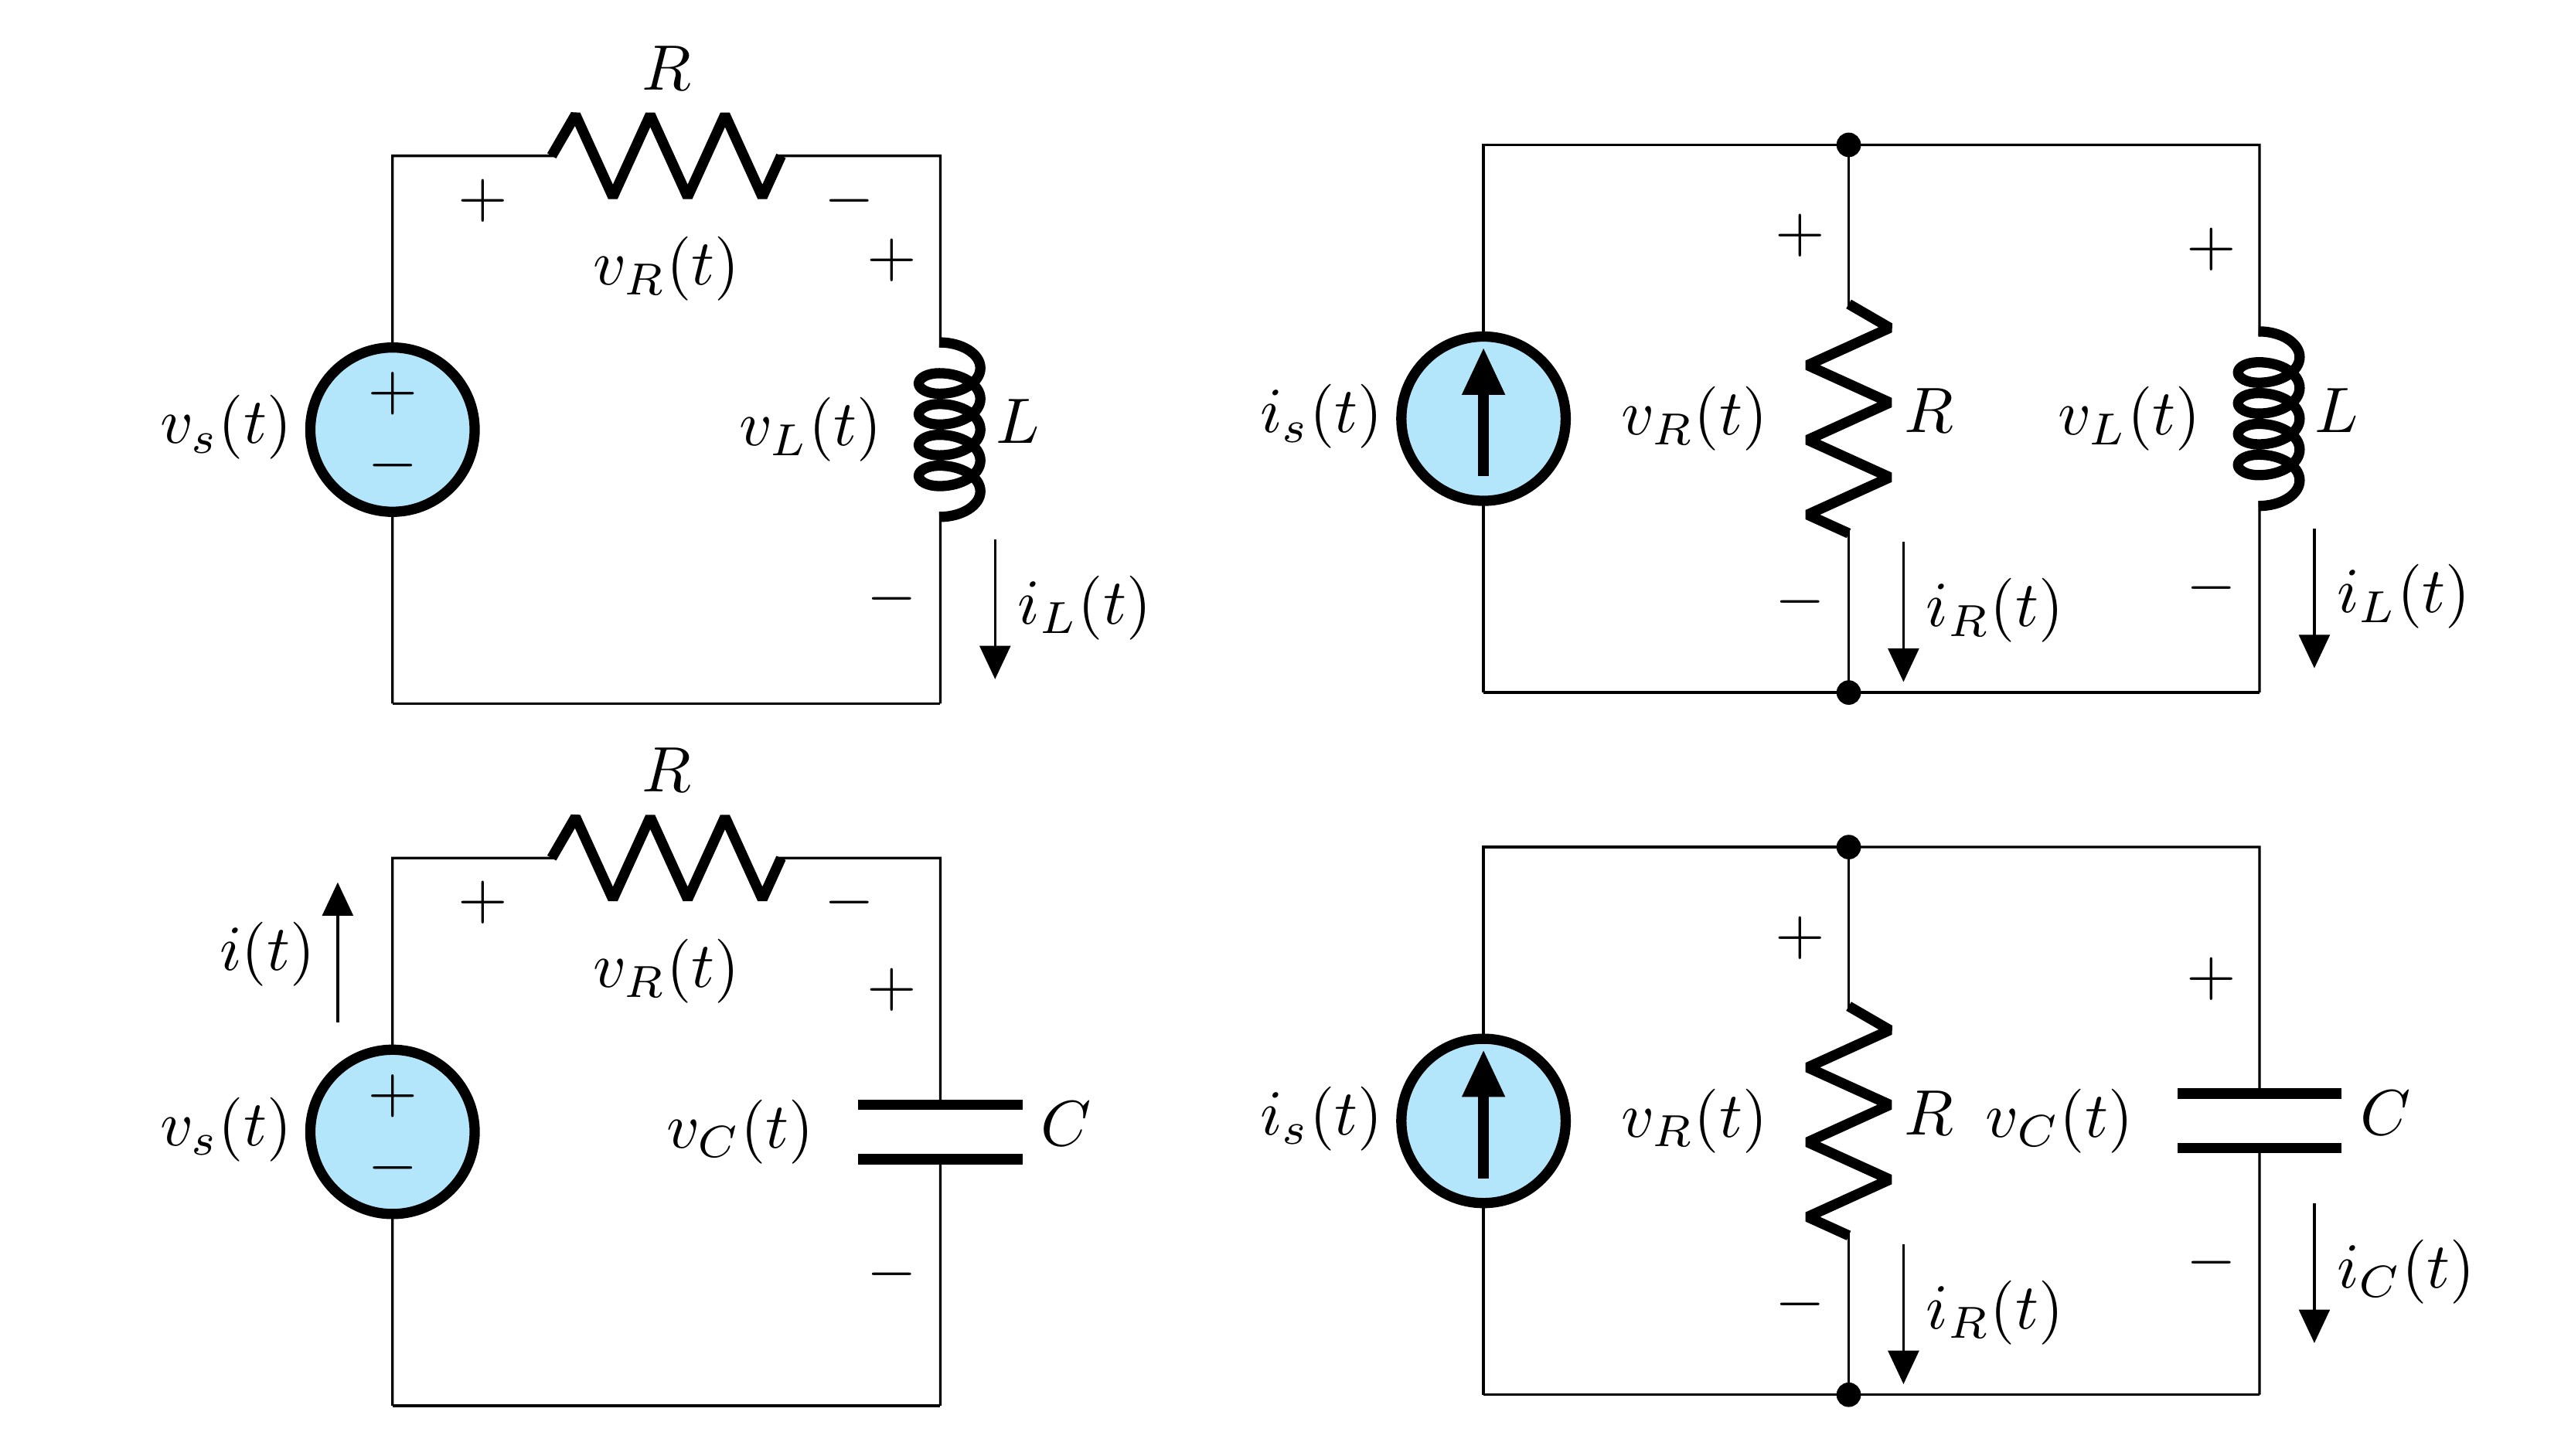

In [3]:
Image("./figures/J11C1.png", width=700)

Lembrando que um circuito de primeira ordem qualquer, com vários resistores e fontes, por exemplo, pode ser reduzido a um dos quatro circuitos acima fazendo $R=R_{th}$, $v_s=v_{th}$ e $i_s=i_{N}$. Logo, desde que o circuito contenha apenas um elemento indutor ou capacitor, a análise de um circuito de primeira ordem deve ser feita primeiramente determinando-se o circuito equivalente de Thévenin ou de Norton conectado aos terminais do elemento em questão.

### EDO linear homogênea

Seja para a corrente passando pelo indutor (circuito RL) ou para a tensão aplicada aos terminais do capacitor (circuito RC), a aplicação das leis de Kirchhoff e da **convenção passiva** nos circuitos RL e RC sempre levarão a uma EDO homogênea separável de primeira ordem do tipo

$$ \begin{equation}\label{eq1} \large \frac{dx(t)}{dt} = -\frac{1}{\tau}x(t), \end{equation}$$ 

com $\tau$ sendo a constante de tempo do circuito. A solução de (\ref{eq1}) pode ser obtida via integração fazendo

$$ \begin{equation}  \large \int_{x\left(t_{0}^+\right)}^{x(t)} \frac{d u}{u}=-\frac{1}{\tau} \int_{t_{0}^+}^{t} d v \end{equation}$$.

Logo, a solução da EDO homogênea será dada por  $$ \begin{equation} \large x(t) = x(t_0^+)e^{-\frac{(t-t_0^+)}{\tau}}. \end{equation} $$

### Resposta natural

A resposta natural de circuitos RL/RC corresponderá a solução da EDO homogênea, ou seja,

$$ \begin{equation} \large i_L(t) = i_L(t_0^+)e^{-\frac{(t-t_0^+)}{\tau}}, \end{equation}$$

com $\tau = L/R$ para o circuito RL e

$$\begin{equation}  \large v_C(t) = v_C(t_0^+)e^{-\frac{(t-t_0^+)}{\tau}}, \end{equation} $$

com $\tau = RC$ para o circuito RC.

### Resposta ao degrau

A resposta ao degrau de circuitos RL/RC corresponderá a solução da EDO homogênea adicionada da solução particular (ou solução de regime estacionário). Logo,

$$\large i_L(t) = i_L(\infty) + A_0e^{-\frac{(t-t_0^+)}{\tau}}, $$

com $\tau = L/R$ para o circuito RL e

$$\large v_C(t) = v_C(\infty) + A_0e^{-\frac{(t-t_0^+)}{\tau}}, $$

com $\tau = RC$ para o circuito RC.

A constante $A_o$ da resposta ao degrau pode ser determinada utilizando as condições iniciais de corrente no indutor ou tensão no capacitor. 

Desse modo, para o circuito RL

$$\large{\begin{align} i_L(t_0^+) &= i_L(\infty) + A_0e^{-\frac{(t_0^+-t_0^+)}{\tau}}\nonumber\\ &= i_L(\infty) + A_0 \nonumber\\ \Rightarrow A_0 &= i_L(t_0^+)- i_L(\infty)\nonumber
\end{align} }$$

e para o circuito RC

$$\large{\begin{align} v_C(t_0^+) &= v_C(\infty) + A_0e^{-\frac{(t_0^+-t_0^+)}{\tau}}\nonumber\\ &= v_C(\infty) + A_0 \nonumber\\ \Rightarrow A_0 &= v_C(t_0^+)- v_C(\infty)\nonumber
\end{align} }$$

### Resposta geral

A resposta geral de circuitos RL/RC corresponderá às expressões,

$$ \begin{equation} \large i_L(t) = i_L(\infty) + \left[i_L(t_0^+)- i_L(\infty)\right]e^{-\frac{(t-t_0^+)}{\tau}},\end{equation} $$

com $\tau = L/R$ para o circuito RL e

$$ \begin{equation} \large v_C(t) = v_C(\infty) + \left[v_C(t_0^+)- v_C(\infty)\right]e^{-\frac{(t-t_0^+)}{\tau}},\end{equation} $$

com $\tau = RC$ para o circuito RC.

Finalmente, para qualquer circuito de primeira ordem,

$$\begin{equation}  \large x(t) = x(\infty) + \left[x(t_0^+)-x(\infty)\right]e^{-\frac{(t-t_0^+)}{\tau}},\end{equation} $$

com $\tau$ sendo a constante de tempo associada a este circuito.

### Problema 1

Para circuito da figura abaixo, a chave encontra-se conectada ao terminal $a$ há muito tempo. Em $t=0s$, posição da chave muda do ponto $a$ para o ponto $b$. Em $t=20 ms$, a chave é desconectada do ponto $b$, permanecendo aberta. Determine:

a. A corrente no indutor para $0^+s\leq t \leq 20^-ms$.\
b. A tensão nos terminais indutor em $t=0^-s$ e $t=0^+s$.\
c. A tensão nos terminais do resistor de 40 $\Omega$ em $t=0^-s$ e $t=0^+s$.\
d. A corrente no indutor para $t\geq20^+ms$.\
e. A tensão nos terminais do indutor em $t=20^+ms$.


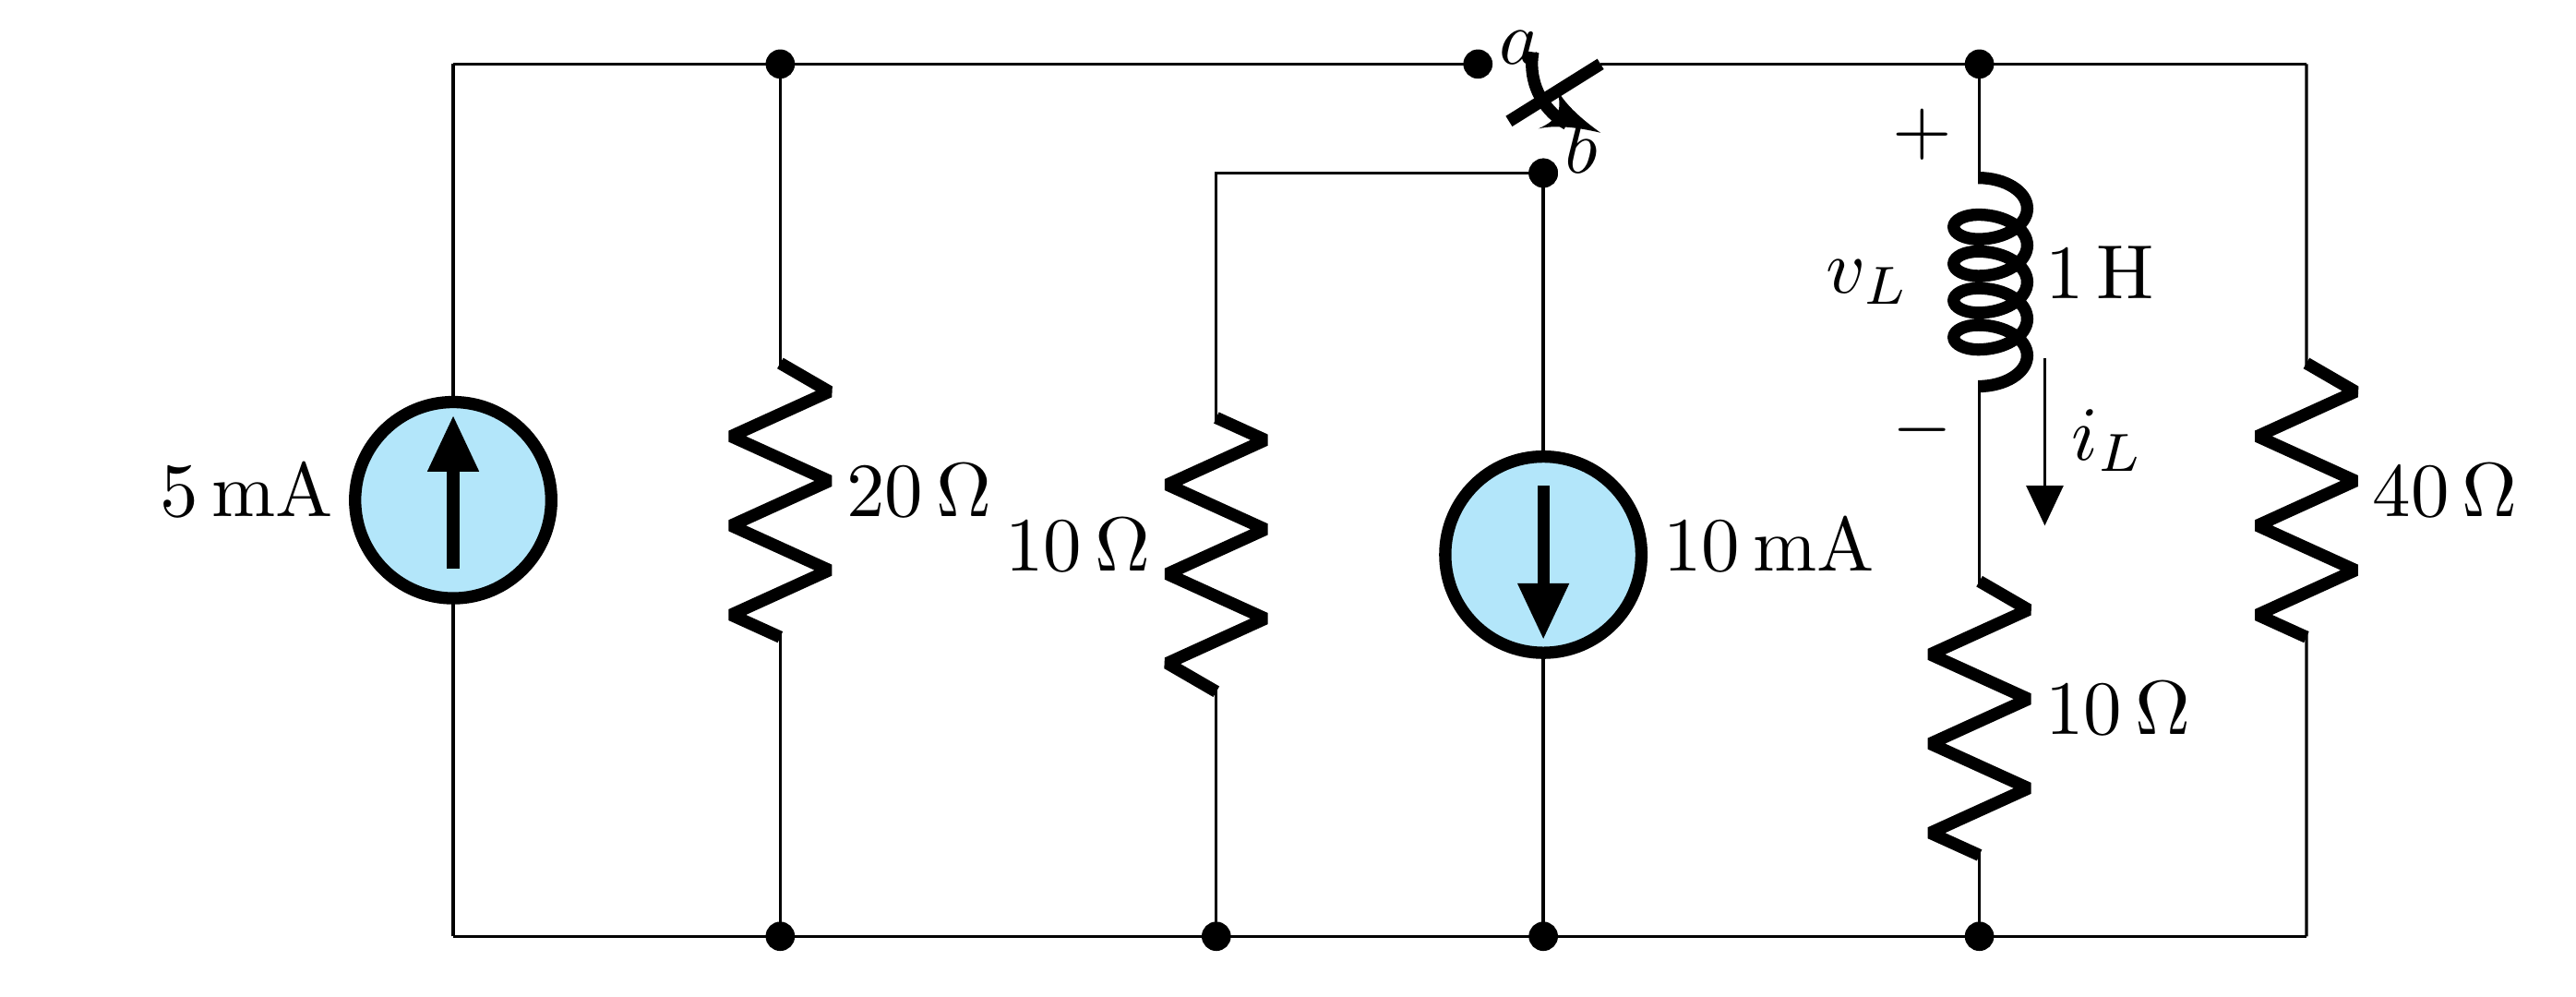

In [4]:
Image("./figures/J11C2.png", width=600)

Simulação do circuito disponível no link: https://tinyurl.com/yfs69qqu

#### Visualização das curvas $i_L(t)$ e $v_L(t)$

In [22]:
from utils import genGIF
import numpy as np

L   = 1
vth = -80e-3
Rth = 18

iL_inf = vth/Rth # iL(infinito)
iL_t0  = 2.9e-3  # iL(t0+)

τ = L/Rth   # constante de tempo do circuito RL
t0  = 0

t  = np.linspace(t0-2*τ, t0+8*τ, 200)
iL = np.zeros(t.size)

iL[t<t0] = iL_t0                                             # iL(t) para t<t0-
iL[t>t0] = iL_inf + (iL_t0 - iL_inf)*np.exp(-(t[t>t0]-t0)/τ) # iL(t) para t>t0+

figName = './figures/J11C2a.gif'
genGIF(t, iL*1000, figName, xlabel = 'tempo (s)', ylabel = '$i_L(t)$ [mA]', fram=t.size, inter=25)

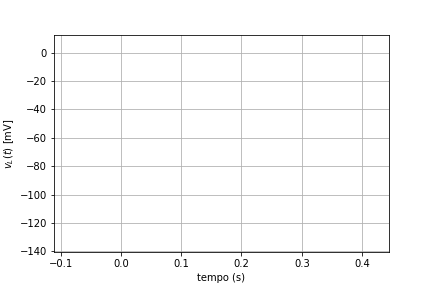

In [28]:
vL = L*np.diff(iL)/np.diff(t) # vL = L*diL/dt tensão aplicada aos terminais do indutor
vL = np.append(vL, vL[0])

figName = './figures/J11C2b.gif'
genGIF(t, vL*1000, figName, xlabel = 'tempo (s)', ylabel = '$v_L(t)$ [mV]', fram=t.size, inter=25)
Image('./figures/J11C2b.gif')

### Problema 2

No circuito da figura abaixo, antes de conectado ao circuito, o capacitor possui uma tensão inicial de $v_C=10~V$. Em $t=0s$, o capacitor é conectado ao circuito. Determine:

a. O circuito equivalente de Thévenin do ponto de vista dos terminais do capacitor.\
b. A tensão no capacitor $v_C(t)$ para $t\geq 0^+s$.\
c. A tensão $v_x(t)$ para $t\geq 0^+s$. 

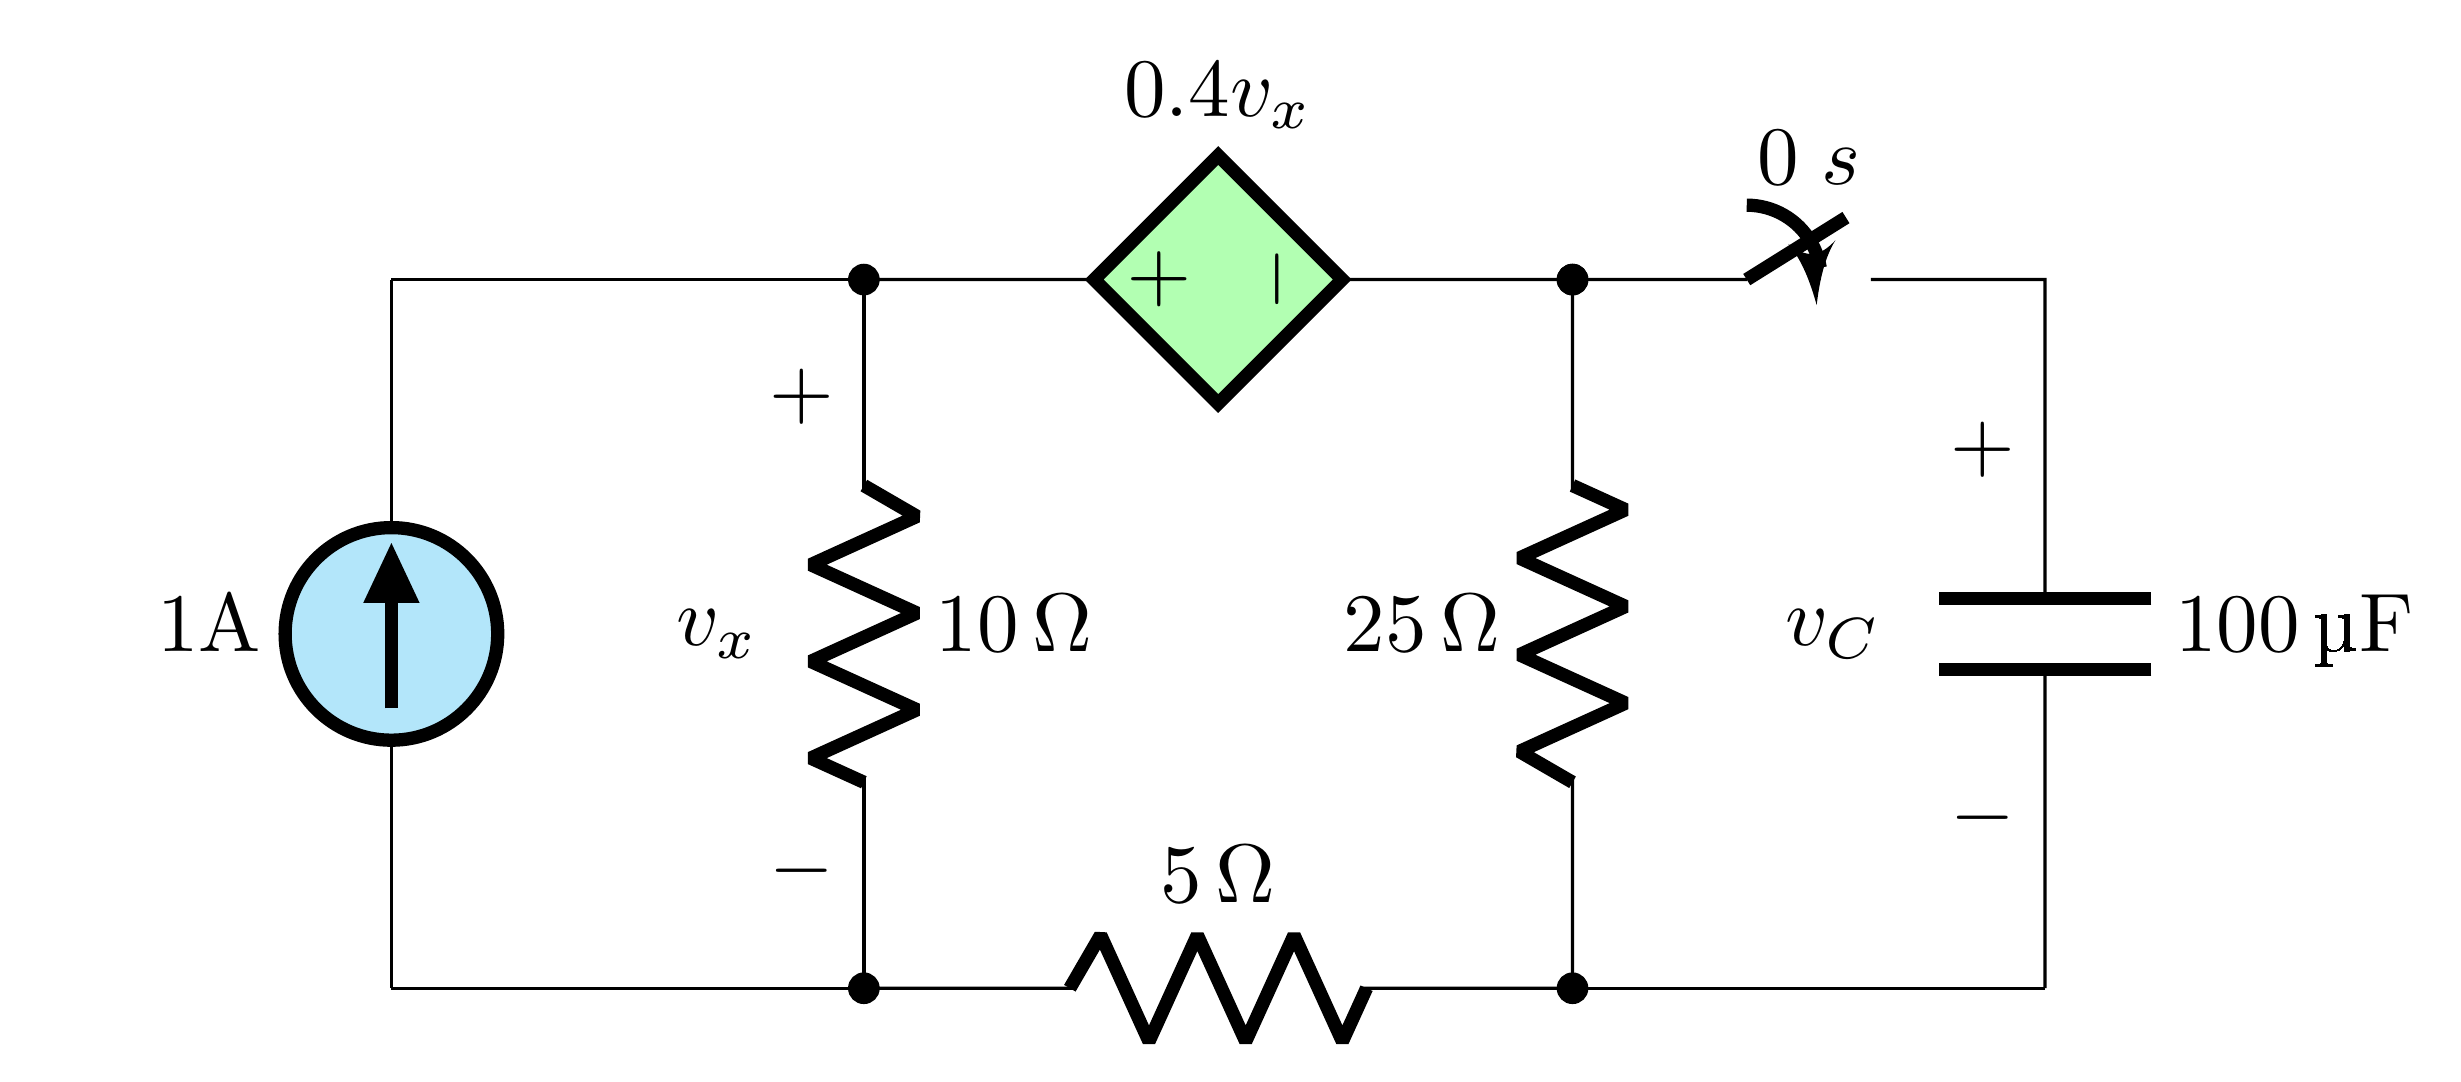

In [5]:
Image("./figures/J11C3.png", width=600)

Simulação do circuito disponível no link: https://tinyurl.com/yzhty8w3